<a href="https://colab.research.google.com/github/SKS1401/MLProject--Customer-Churn-Analysis/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Churn Analysis

## Day-2 👉 Importing Libraries and Dataset


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import shap

###Loading the Dataset without mounting


In [ ]:
dataset=pd.read_csv("Customer-Churn.csv")

## Day-3 👉 Data Preprocessing (Part-1)

###Checking the head of the dataset

In [ ]:
dataset.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###Checking the shape of the dataset

In [ ]:
dataset.head(),dataset.shape

(   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovies      

###Checking how imbalance your dataset is

In [ ]:
dataset['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


###Data Cleaning

####Detecting the erroneous numeric columns by calculating the mean

In [ ]:
#print(dataset['TotalCharges'].mean())

####Converting the string entries to numeric and nan

In [ ]:
dataset['TotalCharges']=pd.to_numeric(dataset['TotalCharges'],errors='coerce')


In [ ]:
print(dataset['TotalCharges'].mean())

2283.3004408418656


####Dropping the nan-containing rows from the dataframe

In [ ]:
dataset=dataset.dropna(subset=['TotalCharges']).copy()

In [ ]:
print(dataset['TotalCharges'].iloc[3331])

564.65


In [ ]:
dataset.shape

(7032, 21)

## Day-4 👉 Data Preprocessing (Part-2)

###Show All The Column List

In [ ]:
list(dataset.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

###Removing unnecessary features
(Independent Variable Declaration)

In [ ]:
X=dataset.drop(columns=['customerID','Churn'])
X.shape

(7032, 19)

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


###Dependent variable declaration

In [ ]:
y=dataset['Churn']

In [ ]:
print(y)

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object


In [ ]:
y=y.map({'No' : 0, 'Yes':1})
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64


###Splitting the dataset into the training set and the test set

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(X_train.head())

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
1413    Male              0     Yes        Yes      65          Yes   
7003    Male              0      No         No      26           No   
3355  Female              0     Yes         No      68          Yes   
4494    Male              0      No         No       3          Yes   
3541  Female              0     Yes         No      49           No   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
1413               Yes     Fiber optic            Yes          Yes   
7003  No phone service             DSL             No           No   
3355               Yes     Fiber optic             No          Yes   
4494                No     Fiber optic             No          Yes   
3541  No phone service             DSL            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
1413              Yes         Yes          No              No        Tw

In [ ]:
y_test.value_counts(normalize=True)

,proportion
Churn,
0,0.734186
1,0.265814


## Day-5 👉 Data Preprocessing (Part-3)

###One-hot encoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

####Selecting the numeric columns

In [ ]:
num_cols=X.select_dtypes(include=np.number).columns.tolist()
print(num_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


####Selecting the categorical columns

In [ ]:
categorical_cols=X.select_dtypes(exclude=np.number).columns.tolist()
print(categorical_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


####Column transformations

In [ ]:
pre=ColumnTransformer(
    transformers=[
        ("cat",OneHotEncoder(handle_unknown="ignore",sparse_output=False),categorical_cols),
        ("num","passthrough",num_cols)
    ]
)

In [ ]:
print(pre.fit_transform(X))


[[1.0000e+00 0.0000e+00 0.0000e+00 ... 1.0000e+00 2.9850e+01 2.9850e+01]
 [0.0000e+00 1.0000e+00 1.0000e+00 ... 3.4000e+01 5.6950e+01 1.8895e+03]
 [0.0000e+00 1.0000e+00 1.0000e+00 ... 2.0000e+00 5.3850e+01 1.0815e+02]
 ...
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.1000e+01 2.9600e+01 3.4645e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 4.0000e+00 7.4400e+01 3.0660e+02]
 [0.0000e+00 1.0000e+00 1.0000e+00 ... 6.6000e+01 1.0565e+02 6.8445e+03]]


## Day-6 👉 Data Preprocessing (Part-4)

###Getting names of encoded categorical columns

In [ ]:
cat_iv_names=pre.named_transformers_['cat'].get_feature_names_out(categorical_cols)
print(cat_iv_names)

['gender_Female' 'gender_Male' 'Partner_No' 'Partner_Yes' 'Dependents_No'
 'Dependents_Yes' 'PhoneService_No' 'PhoneService_Yes' 'MultipleLines_No'
 'MultipleLines_No phone service' 'MultipleLines_Yes'
 'InternetService_DSL' 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No' 'OnlineSecurity_No internet service'
 'OnlineSecurity_Yes' 'OnlineBackup_No' 'OnlineBackup_No internet service'
 'OnlineBackup_Yes' 'DeviceProtection_No'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'TechSupport_No' 'TechSupport_No internet service' 'TechSupport_Yes'
 'StreamingTV_No' 'StreamingTV_No internet service' 'StreamingTV_Yes'
 'StreamingMovies_No' 'StreamingMovies_No internet service'
 'StreamingMovies_Yes' 'Contract_Month-to-month' 'Contract_One year'
 'Contract_Two year' 'PaperlessBilling_No' 'PaperlessBilling_Yes'
 'PaymentMethod_Bank transfer (automatic)'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check']


###Combining the categorical columns with the numeric columns after OneHotEncoding

In [ ]:
all_iv_names = list(cat_iv_names) + num_cols
print(all_iv_names)

['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'Payment

###Converting the transformed output to a DataFrame

In [ ]:
X_transformed= pre.fit_transform(X)
print(X_transformed)

[[1.0000e+00 0.0000e+00 0.0000e+00 ... 1.0000e+00 2.9850e+01 2.9850e+01]
 [0.0000e+00 1.0000e+00 1.0000e+00 ... 3.4000e+01 5.6950e+01 1.8895e+03]
 [0.0000e+00 1.0000e+00 1.0000e+00 ... 2.0000e+00 5.3850e+01 1.0815e+02]
 ...
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.1000e+01 2.9600e+01 3.4645e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 4.0000e+00 7.4400e+01 3.0660e+02]
 [0.0000e+00 1.0000e+00 1.0000e+00 ... 6.6000e+01 1.0565e+02 6.8445e+03]]


In [ ]:
tr_df=pd.DataFrame(X_transformed,columns=all_iv_names)
pd.set_option('display.max_columns',None)
print(tr_df)

      gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  \
0               1.0          0.0         0.0          1.0            1.0   
1               0.0          1.0         1.0          0.0            1.0   
2               0.0          1.0         1.0          0.0            1.0   
3               0.0          1.0         1.0          0.0            1.0   
4               1.0          0.0         1.0          0.0            1.0   
...             ...          ...         ...          ...            ...   
7027            0.0          1.0         0.0          1.0            0.0   
7028            1.0          0.0         0.0          1.0            0.0   
7029            1.0          0.0         0.0          1.0            0.0   
7030            0.0          1.0         0.0          1.0            1.0   
7031            0.0          1.0         1.0          0.0            1.0   

      Dependents_Yes  PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0         

## Day-8 👉 Training the Baseline Model and Evaluation

###Training the baseline model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
pipe_lr=Pipeline([
    #1st step: To perform OneHotEncoding on X_train by using pre
    ("preprocessing",pre),
    #2nd step: Calling the regression Model
    ("classification",LogisticRegression(max_iter=5000,class_weight="balanced"))

])

In [ ]:
pipe_lr.fit(X_train,y_train)
#this pipe_lr model knows which customers will take churn or not

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', 'passthrough',
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('classification',
                 LogisticRegression(class_weight='balanced', max_iter=5000))])

## Day-9 👉 Model Evaluation (Part-1)

In [ ]:
X_test.shape
#used for model testing

(1407, 19)

In [ ]:
X_train.shape
#used for model trained up

(5625, 19)

In [ ]:
X_test.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
974,Female,0,Yes,Yes,59,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),75.95,4542.35
619,Female,0,No,No,7,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),78.55,522.95
4289,Female,0,No,No,54,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.10,1079.45
3721,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.65,38.70
4533,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.15,7555.00
445,Female,0,No,No,60,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,6396.45
5898,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),24.15,800.30
3387,Female,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.65,155.90
1346,Female,0,Yes,Yes,14,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,87.25,1258.60
5690,Male,0,No,No,72,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),61.20,4390.25


In [ ]:
print(y_test.head(10))

974     0
619     0
4289    0
3721    1
4533    0
445     1
5898    0
3387    0
1346    1
5690    0
Name: Churn, dtype: int64


In [ ]:
#direct prediction
y_pred=pipe_lr.predict(X_test)
print(y_pred[:10])# first 10 predicted value of y

[0 1 0 0 0 1 0 0 1 0]


In [ ]:
#probability prediction
y_proba_pred=pipe_lr.predict_proba(X_test)[:,1]
print(y_proba_pred[:10])

[0.04959481 0.7866839  0.01349113 0.40202474 0.23230679 0.72305844
 0.07200374 0.34843751 0.84761562 0.04525358]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[723 310]
 [ 76 298]]


In [ ]:
accuracy_score(y_test,y_pred)

0.7256574271499645

## Day-10 👉 Model Evaluation (Part-2)

###ROC_AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(y_test,y_proba_pred)
print(roc_auc)

0.8351499448675008


###How to check the significant churn predictors using coefficients?


In [ ]:
print(len(all_iv_names))

45


In [ ]:
coef=pipe_lr.named_steps['classification'].coef_[0]#pipe_lr model er classification step er protitar coefficient calculation
importance_df=pd.DataFrame(
    {
        'feature': all_iv_names,
        'coefficient': coef
    }
).sort_values(by='coefficient',ascending=False,key=abs)
print(importance_df)

                                    feature  coefficient
12              InternetService_Fiber optic     0.874762
32                  Contract_Month-to-month     0.824437
34                        Contract_Two year    -0.654428
11                      InternetService_DSL    -0.516330
28                          StreamingTV_Yes     0.423559
31                      StreamingMovies_Yes     0.416485
14                        OnlineSecurity_No     0.327798
39           PaymentMethod_Electronic check     0.324497
23                           TechSupport_No     0.306172
10                        MultipleLines_Yes     0.265135
22                     DeviceProtection_Yes     0.241026
36                     PaperlessBilling_Yes     0.224997
4                             Dependents_No     0.211377
17                          OnlineBackup_No     0.208855
41                            SeniorCitizen     0.203900
30      StreamingMovies_No internet service    -0.162190
27          StreamingTV_No inte

###How to Identify Significant Churn Predictors Using Shap?


In [ ]:
import shap

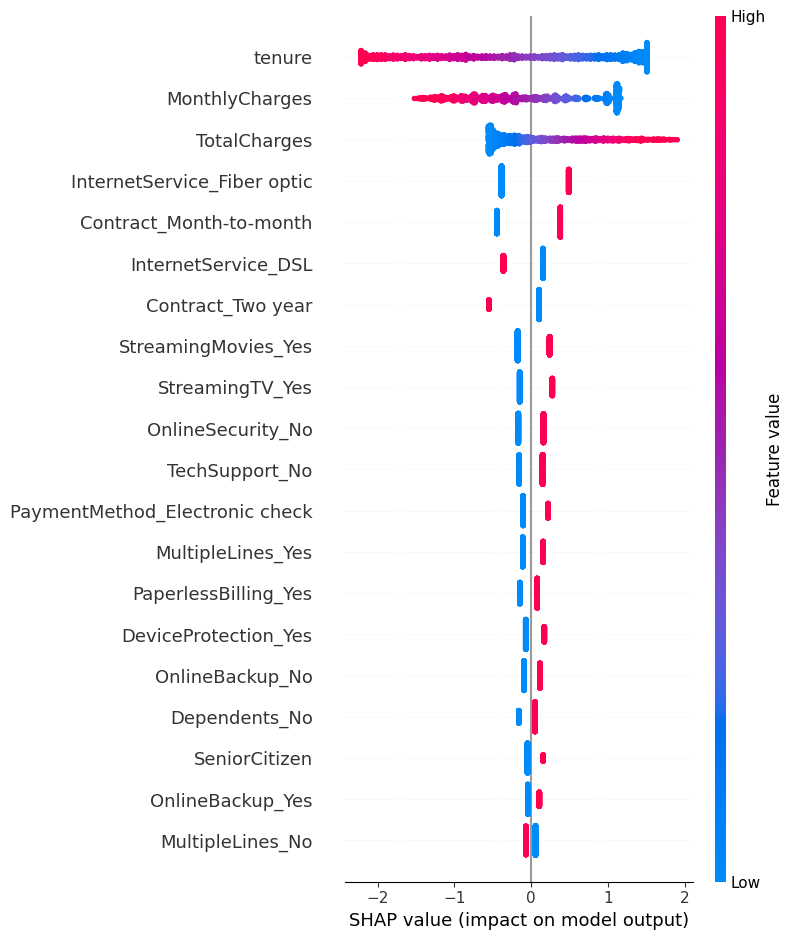

In [ ]:
model=pipe_lr.named_steps['classification']
X_transformed=pre.transform(X_test)
explainer=shap.LinearExplainer(model,X_transformed)
shap_values=explainer.shap_values(X_transformed)
shap.summary_plot(shap_values,X_transformed,feature_names=all_iv_names)